# pandas Basics <hr style="border:2.px solid #Ff0cb"></hr>

Data Analyst: Charles Ian Gabriel M. Guevarra <br>
Department: Electrical Engineering

In [55]:
# %pip install pandas --upgrade
# %pip install matplotlib --upgrade 

In [56]:
# import and packages
import pandas as pd 

In [57]:
import matplotlib.pyplot as plt

In [58]:
import numpy as np

In [59]:
from scipy import stats

# Data Frame

In [60]:
# creating dictionary
data = {
    "Name":['Henry','Owen','Ada'],
    "Age":[22,35,58],
    "Sex":['M','M','F']
}

In [61]:
# create DataFrame from dictionary
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


# Correlation

In [62]:
device = {
    "current":[2, 3.5, 1.8, 4.2, 2.7],
    "power":[100, 200, 90, 210, 110]
}
device

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [63]:
df = pd.DataFrame(device)
df

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [64]:
df.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [65]:
df.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   current  5 non-null      float64
 1   power    5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


In [67]:
df['current']

0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: current, dtype: float64

In [68]:
df['power']

0    100
1    200
2     90
3    210
4    110
Name: power, dtype: int64

In [69]:
df.tail()

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [70]:
df.head()

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [71]:
df.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


In [83]:
type(x)

pandas.core.series.Series

In [84]:
type(b)

numpy.float64

## Scatter Plot

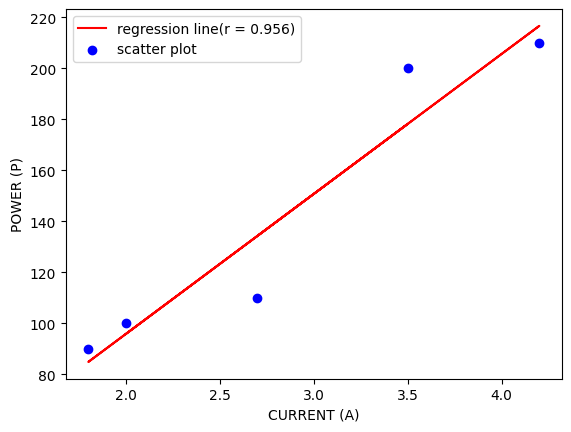

In [74]:
x = df['current']
y = df['power']

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color='r',
         label=f'regression line(r = {r:.3f})')

plt.scatter(x,y,
            color = 'blue',
            label = 'scatter plot'
)
plt.ylabel('POWER (P)')
plt.xlabel('CURRENT (A)')
plt.legend()
plt.show()

# Resistance Test

In [75]:
resistance = pd.read_csv(r'resistance-test.csv')
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [76]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [86]:
jag_mean = resisitance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [85]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [79]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

In [80]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [81]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

<function matplotlib.pyplot.show(close=None, block=None)>

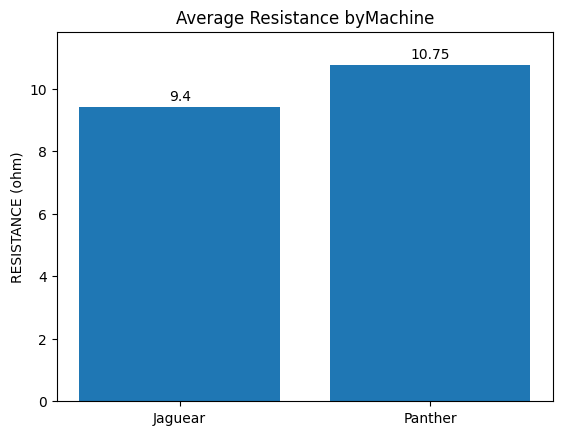

In [88]:
bars = plt.bar(['Jaguear','Panther'],[jag_mean,pan_mean])
plt.title('Average Resistance byMachine')
plt.ylabel('RESISTANCE (ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%
plt.show